### Importing all the essential Python Libraries

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

### Defining the file path to the Decode events log dataset

In [2]:
file_path = 'C://Users/Chiku/Downloads/Bitly Challenge/decodesaa.json'

### Loading in the Decode log JSON dataset into Python

In [3]:
decode_log = [json.loads(line) for line in open(file_path)]

### Displaying the first two records from the Dataset

In [4]:
decode_log[0]

{'a': 'Mozilla/5.0 (Linux; Android 4.4.2; GT-I9507 Build/KOT49H) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/30.0.0.0 Mobile Safari/537.36 [FB_IAB/FB4A;FBAV/28.0.0.20.16;]',
 'c': 'AU',
 'cy': 'Perth',
 'g': '1H8wL5d',
 'h': '1H8wL5c',
 'nk': 1,
 't': 1427288399,
 'tz': 'Australia/West',
 'u': 'http://www.airasia.com/au/en/promotion/rr0550905.page?utm_source=facebook\\u0026utm_medium=organic\\u0026utm_campaign=aa_au_se\\u0026utm_term=SE_Mar15_AU'}

In [5]:
decode_log[1]

{'a': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET4.0C; .NET4.0E; 360SE)',
 'c': 'US',
 'cy': 'Mountain View',
 'g': '1lj67KQ',
 'h': '1xupVE6',
 'mc': 807,
 'nk': 0,
 't': 1427288399,
 'tz': 'America/Los_Angeles',
 'u': 'https://cdn.adf.ly/js/display.js'}

### Converting the Dataset into a Python DataFrame

In [6]:
df = pd.DataFrame(decode_log)

#### Initial examination of the DataFrame

In [7]:
df.shape

(3137627, 14)

In [8]:
df.head()

,a,c,ckw,cy,dp,g,h,kw,mc,nk,pp,t,tz,u
0,Mozilla/5.0 (Linux; Android 4.4.2; GT-I9507 Bu...,AU,NaN,Perth,NaN,1H8wL5d,1H8wL5c,NaN,NaN,1,NaN,1427288399,Australia/West,http://www.airasia.com/au/en/promotion/rr05509...
1,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,US,NaN,Mountain View,NaN,1lj67KQ,1xupVE6,NaN,807,0,NaN,1427288399,America/Los_Angeles,https://cdn.adf.ly/js/display.js
2,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,US,NaN,Buffalo,NaN,1lj67KQ,1xupVE6,NaN,514,0,NaN,1427288399,America/New_York,https://cdn.adf.ly/js/display.js
3,Mozilla/5.0 (iPhone; CPU iPhone OS 8_0_2 like ...,GB,NaN,Leicester,NaN,1z7y10k,1z7y10j,NaN,NaN,1,NaN,1427288399,Europe/London,https://predikta.com/Account/Register
4,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,CN,NaN,Shanghai,NaN,1pv5AIn,1pv5AIm,RTLPHT0814,NaN,0,NaN,1427288399,Asia/Shanghai,http://www.hasbro.com/en_US/brands/telepods/tr...


### Beginning the dataset Analysis

#### Analysing the Top 10 Timezones for Bitlinks

Dealing with the Missing and Blank values for the Timezone

In [9]:
df['tz'].fillna(value='Missing', inplace=True)

In [10]:
df[df['tz'] == ''] = 'Unknown'

In [11]:
top_tz = df['tz'].value_counts()

Listing out the Top 10 Timezones for the Bitlinks

In [12]:
top_tz[:10]

America/New_York       470243
Missing                292936
America/Chicago        195269
Asia/Taipei            167992
Asia/Tokyo             124276
America/Los_Angeles    123311
Europe/London          109017
Europe/Paris            99787
Europe/Berlin           94626
America/Sao_Paulo       94007
Name: tz, dtype: int64

Visualizing the Top 10 Timezones for the Bitlinks

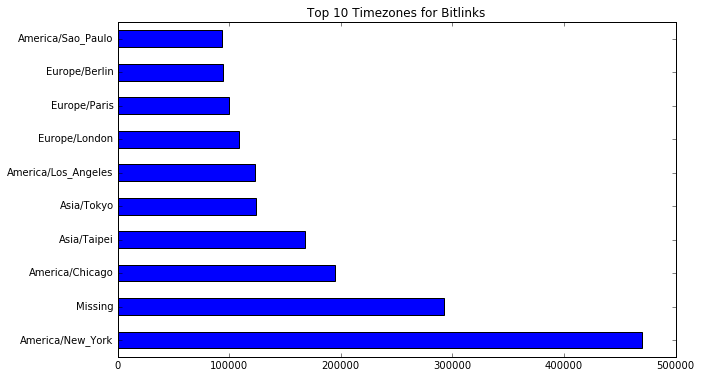

In [13]:
top_tz[:10].plot(kind='barh', figsize=(10, 6), title='Top 10 Timezones for Bitlinks')

#### Analyzing the Top 5 Browsers based on Bit.ly instances

Handling the missing data for the Browser User agent

In [14]:
web_browsers = df['a'].dropna()

Splitting the User browser agent data to obtain browser information

In [15]:
browser_type = Series([browser.split()[0] for browser in web_browsers])

Counting the number of Instances for all the top 5 browsers and loading it into a new variable

In [16]:
top_browsers = browser_type.value_counts()[:5]

Visualizing the Top 5 Browsers for the Bitlinks

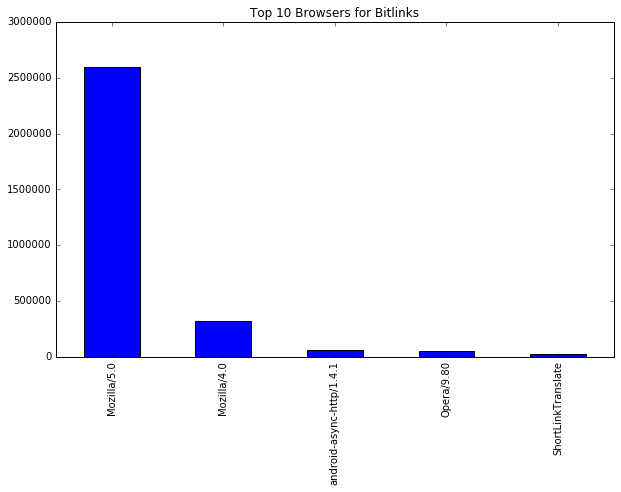

In [17]:
top_browsers.plot(kind='bar', figsize=(10, 6), title='Top 10 Browsers for Bitlinks')

#### Analyzing the number of Instances based on Windows, Mac OS, Android and iPhone systems

Creating a new Dframe where the Null values of User browser agent are ignored

In [18]:
dframe = df[df['a'].notnull()]

Assigning a new column in the Dframe for the type of System accessing the Bitlinks

In [35]:
OS_Windows = np.where(dframe['a'].dropna().str.contains('Windows'), 'Windows system', 'Not Windows')
OS_Windows = pd.DataFrame(OS_Windows)
OS_Windows.columns = ['Windows system or Not']

In [37]:
OS_Mac = np.where(dframe['a'].str.contains('Mac OS'), 'Mac OS system', 'Not Mac OS')
OS_Mac = pd.DataFrame(OS_Mac)
OS_Mac.columns = ['Mac OS system or Not']

In [38]:
Android = np.where(dframe['a'].dropna().str.contains('Android'), 'Android system', 'Not Android')
Android = pd.DataFrame(Android)
Android.columns = ['Android system or Not']

In [39]:
iPhone = np.where(dframe['a'].dropna().str.contains('iPhone'), 'iPhone system', 'Not an iPhone')
iPhone = pd.DataFrame(iPhone)
iPhone.columns = ['iPhone device or Not']

In [40]:
win_inst = OS_Windows['Windows system or Not'].str.contains(r'Windows system').sum()
mac_inst = OS_Mac['Mac OS system or Not'].str.contains(r'Mac OS system').sum()
android_inst = Android['Android system or Not'].str.contains(r'Android system').sum()
iphone_inst = iPhone['iPhone device or Not'].str.contains(r'iPhone system').sum()

In [44]:
instances = pd.DataFrame( {'Number of Windows instances' : win_inst, 'Number of Mac instances' : mac_inst, 'Number of Android instances' : android_inst, 'Number of iPhone instances' : iphone_inst}, index = ['Type of Device'] )

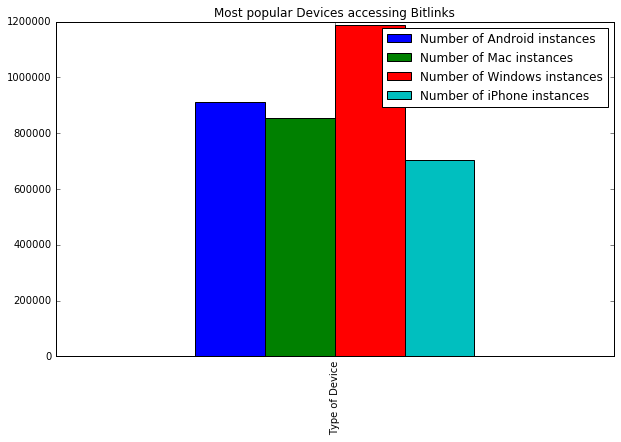

In [46]:
instances.plot(kind='bar', figsize=(10, 6), title='Most popular Devices accessing Bitlinks')

In [47]:
instances

,Number of Android instances,Number of Mac instances,Number of Windows instances,Number of iPhone instances
Type of Device,910606,853716,1188716,702734


#### Analyzing the Top 10 countries with the most number of Bitlink instances

Dealing with the missing and the blank values for the Country column

In [48]:
df['c'].fillna(value='Missing', inplace=True)

In [49]:
df[df['c'] == ''] = 'Unknown'

In [50]:
top_countries = df['c'].value_counts()

In [51]:
top_countries[:10]

US    1008105
TW     167992
BR     149813
JP     124276
GB     109017
FR      99787
DE      94626
IT      91250
TR      80736
IN      75509
Name: c, dtype: int64

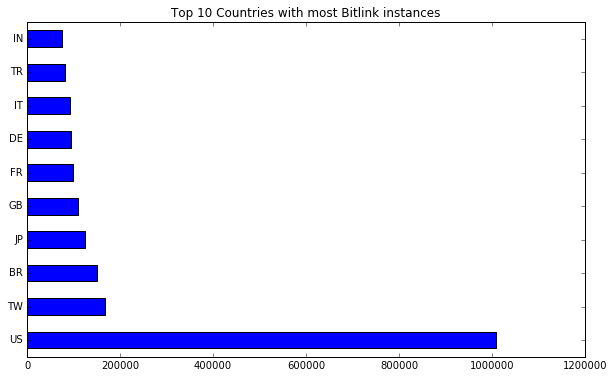

In [52]:
top_countries[:10].plot(kind='barh', figsize=(10, 6), title='Top 10 Countries with most Bitlink instances')

#### Analyzing the Top 10 most active users

##### Analyzing the Top 10 active users based on no. of instances

In [53]:
df['h'].value_counts(sort=True, ascending=False).head(10)

1xupVE6    291553
1xx3efT     72592
1wjzKjw     55342
1lj67KP     41592
18xsLfw     24093
1bsU78E     20860
1Im9An5     17972
1vxSX3E     13480
1w3mXlD     10480
1ceCjf6      9669
Name: h, dtype: int64

##### Analyzing the Top 10 active users based on the most no of repeat-clicks

In [55]:
repeat_client = dframe.groupby("h").agg({"nk": np.sum, "h": pd.Series.nunique})

In [57]:
repeat_client.sort('nk', ascending=False).head(10)

C:\Users\Chiku\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,nk,h
h,,
1xx3efT,57088,1
1wjzKjw,54310,1
1bsU78E,19164,1
18xsLfw,11434,1
1vxSX3E,8748,1
1Im9An5,8445,1
1yNztpt,6404,1
1N66YJp,5512,1
1F7lcFZ,5388,1


## Bitly Challenge Decode Dataset 1 file
### Access it at: http://nbviewer.jupyter.org/github/namman2/Data-Analytics-Projects/tree/master/